
# Support Vector Machine

`This is ongoing work.`
* only one vs rest
* -1 and +1

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style

style.use("seaborn")

%matplotlib inline

In [145]:
dataset = np.array([
    [1,2,1],
    [8,9,-1],
    [1.5,2.2,1],
    [10,11,-1],
    [0.5,1.23,1],
    [8.5,9.5,-1],
    [0.83,4.33,1],
    [10.32,11,-1]
])
columns = ['f1','f2','target']
X = dataset[:,[0,1]]
y = dataset[:,[-1]]

## Vectors

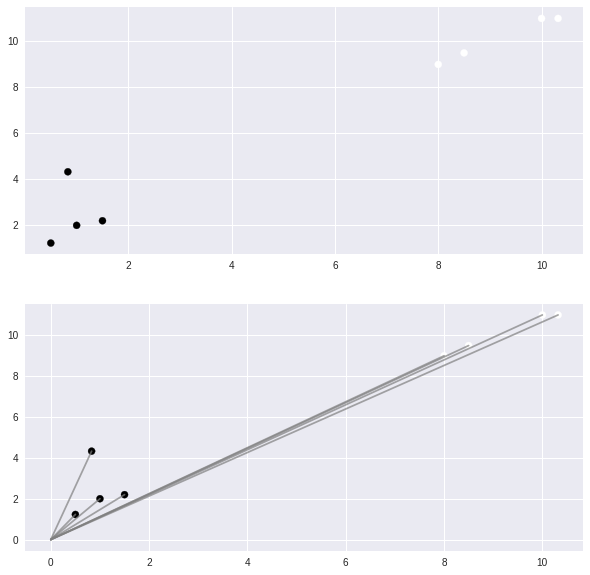

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,(1,2))
ax.scatter(dataset[:,[0]],dataset[:,[1]],c=dataset[:,[-1]],s=50)

ax = fig.add_subplot(2,2,(3,4))
ax.scatter(dataset[:,[0]],dataset[:,[1]],c=dataset[:,[-1]],s=50)

for i in dataset[:,[0,1]]:
    ax.plot([0,i[0]],[0,i[1]],c='grey',alpha=0.7)

plt.show()

### dot product

In [13]:
x = np.array([[1],[2]])
y = np.array([[2],[3]])

(
    x.shape , 
    y.shape
)

((2, 1), (2, 1))

In [14]:
x * y

array([[2],
       [6]])

### cross product

In [15]:
(
    x , 
    y.T , 
    x @ y.T
)

(array([[1],
        [2]]),
 array([[2, 3]]),
 array([[2, 3],
        [4, 6]]))

### magnitude $||\vec{A}||$ 

In [16]:
(
    x, 
    np.sqrt(np.sum(x**2)), 
    np.linalg.norm(x)
)

(array([[1],
        [2]]),
 2.23606797749979,
 2.23606797749979)

### project $\vec{A}$ to $\vec{B}$

$$
proj_\vec{A}(\vec{B}) = (\vec{A}.\vec{B}).\frac{\vec{B}}{||\vec{B}||^2}
$$

#### dot product
$\vec{A}.\vec{B} \sim A^T.B \sim B @ A.T$

B @ $A.T  \sim A @ $B.T$ (only difference in shape)

In [124]:
W = np.array([[1,3]])
X = np.array([[4,5],[6,7],[1,8]])

W.shape, X.shape

((1, 2), (3, 2))

In [125]:
W @ X.T

array([[19, 27, 25]])

In [126]:
X @ W.T

array([[19],
       [27],
       [25]])

#### Projection

In [110]:
def projection(A, B):
    return (B @ A.T) * (B / np.linalg.norm(B)**2)

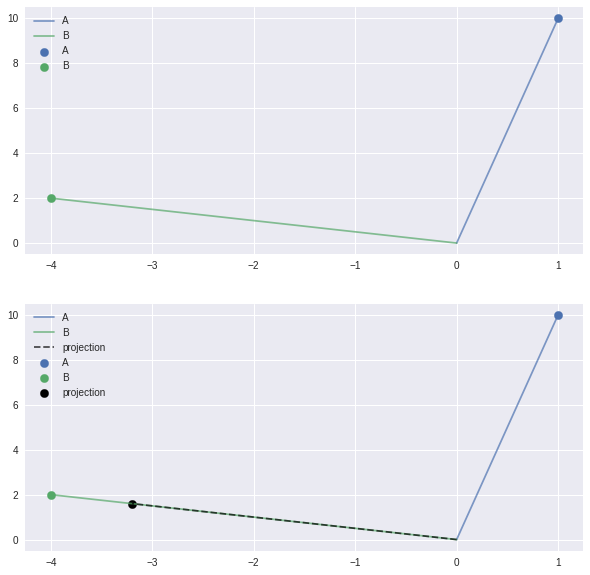

In [114]:
A = np.array([[1,10]]) 
B = np.array([[-4,2]])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,(1,2))

ax.scatter(A[:,[0]],A[:,[1]],s=70,label="A")
ax.scatter(B[:,[0]],B[:,[1]],s=70,label="B")


for i in A:
    ax.plot([0,i[0]],[0,i[1]],alpha=0.7,label='A')
for i in B:
    ax.plot([0,i[0]],[0,i[1]],alpha=0.7,label='B')

ax.legend(loc='best')


ax = fig.add_subplot(2,2,(3,4))

ax.scatter(A[:,[0]],A[:,[1]],s=70,label='A')
ax.scatter(B[:,[0]],B[:,[1]],s=70,label='B')

for i in A:
    ax.plot([0,i[0]],[0,i[1]],alpha=0.7,label='A')
for i in B:
    ax.plot([0,i[0]],[0,i[1]],alpha=0.7,label='B')
    
proj = projection(A,B)

ax.scatter(proj[:,[0]],proj[:,[1]],s=70,label="projection",c='black')
for i in proj:
    ax.plot([0,i[0]],[0,i[1]],c='black',alpha=0.7,label="projection",ls='--')

ax.legend(loc='best')
plt.show()

- convex optimization docs
    * [CVXOPT](http://cvxopt.org/)
    * [Convex Optimize](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)

## Cost function

In [186]:
C = 1.0
distance = 1 - y * (W @ X.T)
distance[distance<0] = 0
distance = np.max(d,axis=1,keepdims=True)

cost = (W @ W.T / 2) - (C * np.mean(distance,keepdims=True))

cost

array([[-17.16]])